## 【AIコース】大課題 ボストン住宅価格予測 決定木

### ●データを取得する

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

### ●取得データをDataFrameにする

In [3]:
import pandas as pd
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])

In [4]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### ●基本的なデータ探索　　「基本的なデータ探索について記述せよ」

A.scikit-learnに付属している標準データセットの一つで米国ボストン市郊外における地域別の住宅価格のデータセットである。　　

　機械学習やデータマイニングをすぐに簡単に試す事が出来るように、David Cournapeauという人が初版を2007年に作成した。　　
 
  各カラムの構成  
   __CRIM__	人口 1 人当たりの犯罪発生数  
  __ZN__	25,000 平方フィート以上の住居区画の占める割合  
  __INDUS__	小売業以外の商業が占める面積の割合  
  __CHAS__	チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)  
  __NOX__	NOx の濃度  
  __RM__	住居の平均部屋数  
  __AGE__	1940 年より前に建てられた物件の割合  
  __DIS__	5 つのボストン市の雇用施設からの距離 (重み付け済)  
  __RAD__	環状高速道路へのアクセスしやすさ  
  __TAX__	$10,000 ドルあたりの不動産税率の総計  
  __PTRATIO__	町毎の児童と教師の比率  
  __B__	町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2  
  __LSTAT__	給与の低い職業に従事する人口の割合 (%)  

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### ●一変数の可視化

In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### ●describeメソッドを用いることで把握できたこと(考察)を記述せよ

A.
__前処理に関して気をつけるべき点__ 

●前処理をする際には、このデータマイニングに於ける目的を明確に理解する必要がある。それによって前処理の内容が変わってくるため。そして、各カラムの数値の単位が違う事も考慮しなければならない。あまりにも各カラム毎の値の分散が大きい場合はその分散を大きくしている原因であるカラムをどう処理するか考える必要がある。

__機械学習の手法選択に活かせること__　　

●各カラムの数値が「連続値」か「離散値」なのかで手法選択の有力な判断基準になる。

__機械学習の特徴選択について考えられること__  

●Feature_namesを見ると目的変数（target）である「住宅価格」と関係がありそうだと直感的に分かるものがある。先ずはそれらを選んで相関関係を調べていくと良いかもしれない。

### ●二変数の可視化　相関

In [8]:
# corr() カラム内全ての変数の相関関係を導く。
X=pd.concat([X,y],axis=1)
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### ●二変数の可視化について記述せよ　相関

A.相関とは、２つ以上の物事が互いの変化に影響を及ぼし合う関係。お互いがお互いの影響を受けて関わりあっている関係。　　

__MEDVにもっとも相関があると出力された変数上位３つ__　　

1.RM（住居の平均部屋数）相関度0.695360  

2.ZN（25,000 平方フィート以上の住居区画の占める割合）相関度0.360445 

3.B (町毎の黒人 (Bk) の比率を次の式で表したもの)  相関度0.333461

相関が強い変数を判明させる事で、目的（住宅価格予測）を予測するために必要となる特徴量をある程度絞りこむ事が出来る。（得たい成果に照準を絞って次元削減を行う事が出来る）

### ●相関の注意点について記述せよ

A.第３変数（潜伏変数）によって、２つの事象（変数）には相関関係がないのにも関わらず相関関係があるように推測されてしまう場合。

　疑似相関を生み出さないためにもつねに第三変数の存在を視野に入れながら検討する必要がある。　　
 
　また、第三変数が介在することが分かった時、第三変数の影響を取り除いた（パーシャルアウトした）「偏相関係数」というものを求めることが可能。

### ●二変数の可視化　プロット

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
x1=X.loc[:,['RM','ZN','B','MEDV']]

/Users/takahashikoji/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


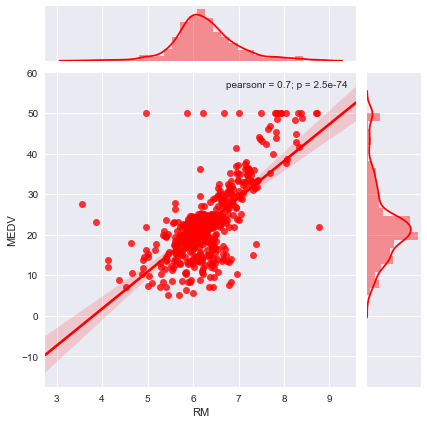

In [11]:
# RM(住居の平均部屋数) とMEDV（住宅価格）の相関関係。
sns.jointplot(x='RM',y='MEDV',data=x1,color='r',kind="reg")

/Users/takahashikoji/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


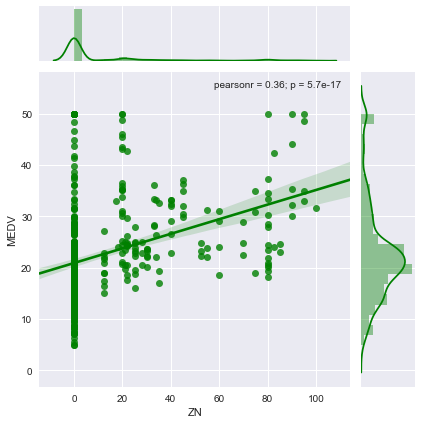

In [12]:
# ZN(25,000 平方フィート以上の住居区画の占める割合) とMEDV（住宅価格）の相関関係。
sns.jointplot(x='ZN',y='MEDV',data=x1,color='g',kind="reg")

/Users/takahashikoji/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


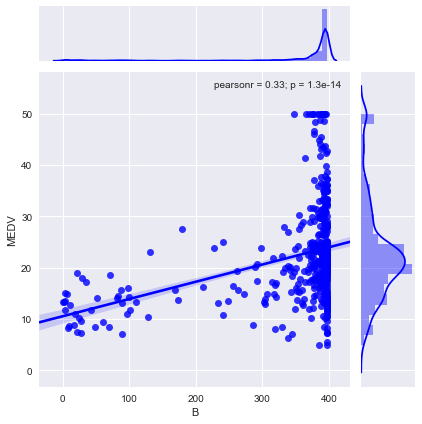

In [13]:
# B (町毎の黒人 (Bk) の比率を式で表したもの) とMEDV（住宅価格）の相関関係。
sns.jointplot(x='B',y='MEDV',data=x1,color='b',kind="reg")

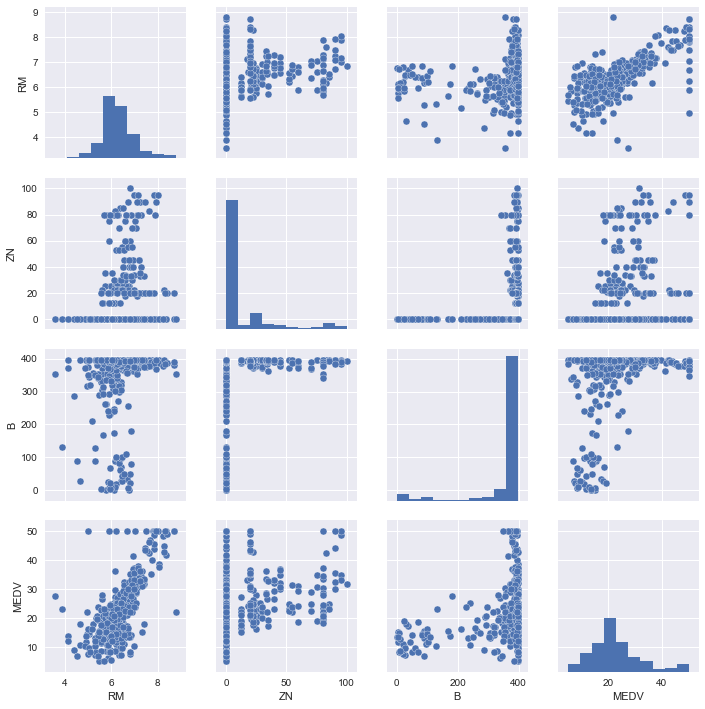

In [14]:
# DataFrame(x1)に含まれる全ての変数同士についての散布図を簡単に見ることが出来る。
sns.pairplot(x1)

### ●二変数の可視化について記述せよ　プロット

A.二変数の相関関係は変数間の線形的な関係を前提としているから、散布図がより直線のベクトルにフィットする傾向にあれば二変数の相関関係は高いと推測出来る。なのでX.corr()で相関を示した通り、やはり赤で図示した「RM(住居の平均部屋数) とMEDV（住宅価格）」の相関関係が最も高く、緑と青の相関度がそれに続くという結果になった。なので今回の相関はそれぞれ信用出来ると言える。

In [15]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])

### ●データセット分割

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

### ●学習 決定木モデルの決定係数を求める

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1) # 深度1
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [18]:
# 決定木　深度１の決定係数
tree.score(X_test,y_test)

0.41228899841023564

In [19]:
tree = DecisionTreeRegressor(max_depth=2) # 深度2
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [20]:
# 決定木　深度2の決定係数
tree.score(X_test,y_test)

0.73783436559527238

In [21]:
tree = DecisionTreeRegressor(max_depth=3) # 深度3
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [22]:
# 決定木　深度3の決定係数
tree.score(X_test,y_test)

0.8219906043042795

### ●学習曲線

In [23]:
# メソッドを定義

import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameter
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


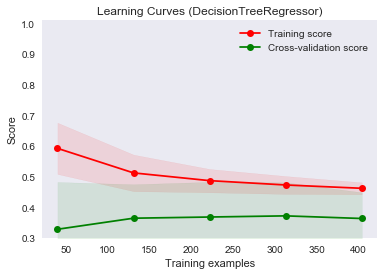

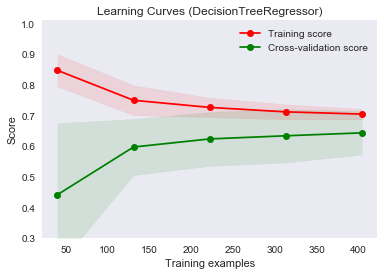

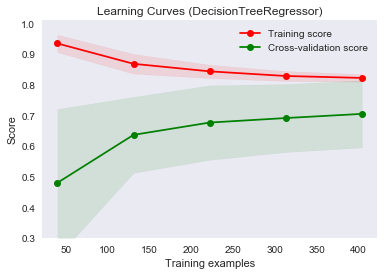

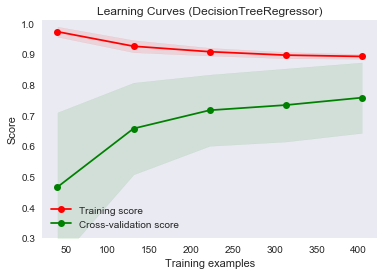

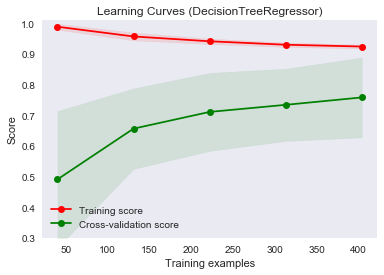

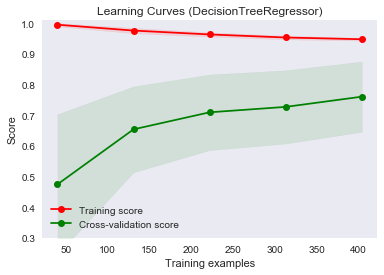

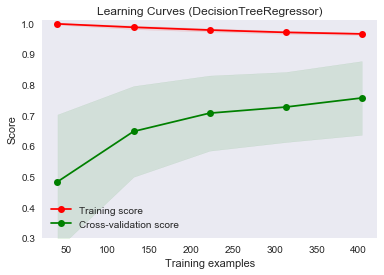

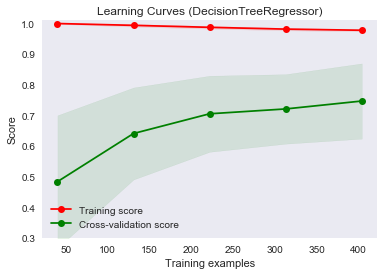

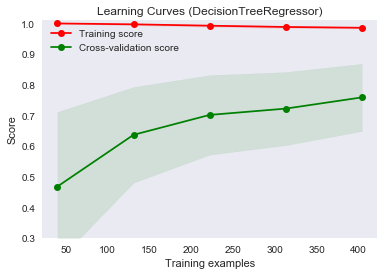

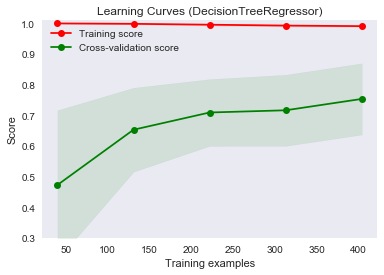

In [24]:
# メソッド呼び出し

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor



title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title,X ,y , ylim=(0.3, 1.01), cv=cv, n_jobs=4)

### ●学習曲線について記述せよ

A.「High variance」は過学習(overfitting)の事で「High Bias」は未学習(underfitting)の事である。　　

   最も良い精度と思われるものは交差検証のscoreが一番良いと思われる深度６、７の学習曲線。　　
   
   深度が深くなるに連れて学習曲線が1に近づいている。それとシンクロして交差検証の結果も横ばいになってきている。　　
   
   なので深度６より深度を深くしても交差検証の結果は変わらないか、逆にそれ以上深度を下げると過学習を起こしてしまう気がする。

### ●グリッドサーチ

In [45]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor()
params = {"max_depth": list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5) # cv=交差検定の回数
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 10}


In [50]:
# 平均二乗誤差（MSE）の計算

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)

(0.82956446370984616, 18.340363575580827)

In [36]:
# 決定係数
grid.score(X_test,y_test)

0.87639873091111131

### ●グリッドサーチについて記述せよ

A.グリッドサーチとは、機械学習のハイパーパラメータ探索（機械学習で良い精度を出すために、良いハイパーパラメータの値を探すこと）の手法のひとつ。ハイパーパラメータの探索空間を格子状 (グリッド) に区切り、交点となるハイパーパラメータの組み合わせについて、すべて調べるという方法。
ハイパーパラメータの探索方法として、グリッドサーチの他に「ベイズ最適化」などがある。　　

グリッドサーチが格子状（グリッド）に区切られた交点のハイパーパラメータの組み合わせを全て調べるのに対し、ベイズ最適化はすでに持っている情報から、次にどの点を調べた方がいいかを判断し、実際に評価を行い、その結果を次の判断に利用するということを自動的に行ってくれる手法でありすべてのハイパーパラメータを調べない分、効率的に最適値に辿り着ける。　　

ハイパーパラメータ探索に於いてグリッドサーチよりもベイズ最適化の方が計算時間、パラメータ探索精度の点で優れているのでベイズ最適化を積極的に使う方が良いと思われる。

### ●グリッドサーチを使いこなそう

In [58]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth": list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


In [52]:
# 平均二乗誤差（MSE）の計算

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)

(6.3115383843433488, 23.978828641356053)

In [32]:
# 決定係数
grid.score(X_test,y_test)

0.86042319038229753

In [54]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth": list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 6}


In [55]:
# 平均二乗誤差（MSE）の計算

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)

(4.1238087916446604, 13.643123779266224)

In [39]:
# 決定係数
grid.score(X_test,y_test)

0.81604277885174292

A.Kfoldの折りたたみの回数(交差検定回数)を3回と10回に変えて検証したところ、決定係数の値だと[cv=5]の時、決定係数が最も高くなる。なのでベストな折りたたみ回数は５回である可能性が高い。平均二乗誤差は上記に記述しました。

### ●テスト

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [69]:
print('決定係数 %.3f' % tree.score(X_test,y_test))

決定係数 0.805
